<a href="https://colab.research.google.com/github/leesihwan21/AI_26/blob/main/05_01_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 결정 트리는 스무고개 놀이와 비슷합니다. 데이터에 질문을 던져서 "예/아니오"로 나누며 최종 답을 찾아가는 알고리즘
# 스케일 조정은 안해도 된다.
# 의사결정을 할 수 있는 트리다.

# MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
# 주류는 온라인 판매가 안되서 온라인 예약 후에
# 오프라인매장에서 구매를 유도하려고 함

# 입고된 와인을 보니 레드와인인지 화이트와인인지 구분표시가 안되었음
# 캔에 인쇄된 알콜도수, 당도, pH 값으로 와인 종류를 구별해보자.

# 품질확인용으로 뜯은 캔이 테스트용으로 있고 이것을 데이터로 활용
# 로지스틱 회귀 모델로 적용을 해서 알아보자.

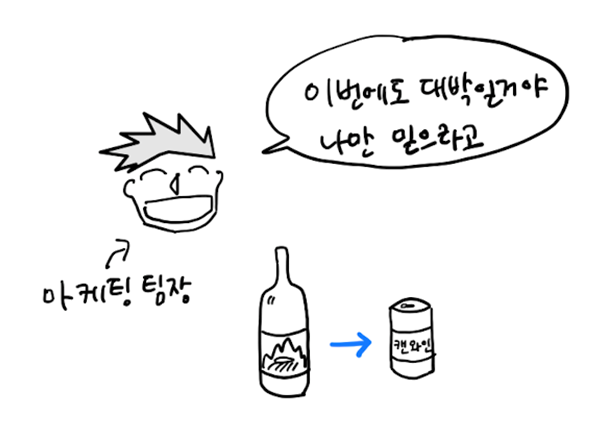

In [ ]:
# 와인의 특성화된 데이터를 넣자.
import pandas as pd
# Pandas(pd)의 핵심 역할
# 데이터프레임(DataFrame) 생성
# 엑셀의 시트와 똑같은 구조라고 보시면 됩니다. 행(Row)과 열(Column)로 구성된 표
# 데이터 읽기 및 저장 (read_csv, to_csv)
# CSV, Excel, SQL 등 다양한 형식의 데이터를 클릭 한 번 없이 코드로 불러옵니다.
# 데이터 탐색 (head, info, describe)
# 데이터가 어떻게 생겼는지, 빈 칸(결측치)은 없는지 순식간에 파악합니다.
# fish.head(): 상위 5개 데이터 확인
# fish.describe(): 평균, 표준편차 등 통계 정보 확인

# 지금까지 **데이터 생성(NumPy) -> 데이터 관리(Pandas) -> 학습(SGD/결정트리) -> 시각화(Matplotlib)**까지 머신러닝의 풀 코스를 다 밟으셨습니다!

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
# 알콜, 당도, 산도, 클래스(타깃 =0 (레드와인), 1(화이트 와인))
# 데이터에서 화이트와인이 양성클래스로 화이트와인을 표시하는 문제

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()
# 결과 6497개의 샘플 4개의 열(실수형)
# Non-Null 누락된 값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()   # 열에 대한 통계
# mean=평균, std=표준편차, min=최소
# 25%=1사분위수, 50%=중간값(2 사분위), 75%=3사분위, max=(100%, 4사분위)
# 사분위수 : 데이터를 순서대로 4등분한 값
# 사분위수는 데이터의 **'치우침(Skewness)'**과 **'이상치(Outlier)'**를 찾는 데 아주 유용합니다.


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# StandardScaler 클래스로 특성을 표준화 해야함
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 넘파이 배열로 변환
# 와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data 배열에 저장

target = wine['class'].to_numpy()
# class 열을 넘파이 배열로 바꿔서 target(정답) 배열에 저장

print(data) # 훈련 입력 값

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [ ]:
print(target)  # 훈련 정답

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
# 훈련세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42)
# train_test_split() 함수는 설정값을 지정하지 않으면 25% 를 테스트 세트로 지정
# test_size = 0.2를 이용해서 20% 정도만 테스트 세트로 지정
print(train_input.shape, test_input.shape) # 6496 * 0.8 = 5196.8

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 훈련세트 전처리 (표준점수로 변환 : 단위를 맞추는 효과)
ss = StandardScaler()
ss.fit(train_input) # 훈련시작

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled)
print('----------------')
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
----------------
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 모델 훈련
lr.fit(train_scaled, train_target)  # 훈련시작

print(lr.score(train_scaled, train_target))     # 78.08%
print(lr.score(test_scaled, test_target))       # 77.78%
# 결론 80점 이하로 점수가 낮게 나옴(과소적합)

0.7808350971714451
0.7776923076923077


In [ ]:
# 제출용 보고서를 만들어 보자.
print(lr.coef_, lr.intercept_)    # 로지스틱 회귀(계수=가중치, 절편=더해지는 값)
# lr.coef_ (계수/가중치): 각 특성이 결과에 미치는 영향력의 크기와 방향을 나타냅니다.
# 값이 클수록 해당 특성이 정답을 결정하는 데 중요한 역할을 한다는 뜻 입니다.
# lr.intercept_ (절편): 모든 특성이 0일 때 기본적으로 더해지는 값 입니다.

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# 알콜 도수값이 0.51268071를 곱하고,
# 당도에 1.67335441를 곱하고,
# pH값에 -0.68775646을 곱한 다음 모두 더함
# 위에 나온 값에 절편 1.81773456을 더함
# 이값이 0보다 크면 화이트 와인, 작으면 레드와인
# 현재 77% 정도 정확히 화이트 와인으로 분류 완료!!!!

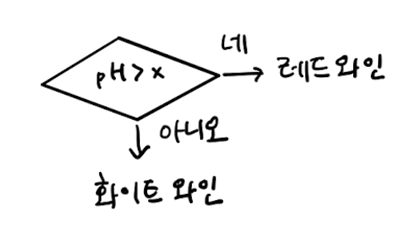

In [ ]:
# 결정 트리(이유를 설명하기 쉽다. 제출용 보고서 작성 후)
# if문을 사용하는 것과 유사
from sklearn.tree import DecisionTreeClassifier # Decision: 결정_디시전

# DecisionTreeClassifier 결정 트리 모델로 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)    # 훈련시작

print(dt.score(train_scaled, train_target))   # 훈련 세트
print(dt.score(test_scaled, test_target))     # 테스트 세드
# 과대 적합됨 (훈련점수 : 99.69%, 테스트 점수 : 85.92%)

0.996921300750433
0.8592307692307692


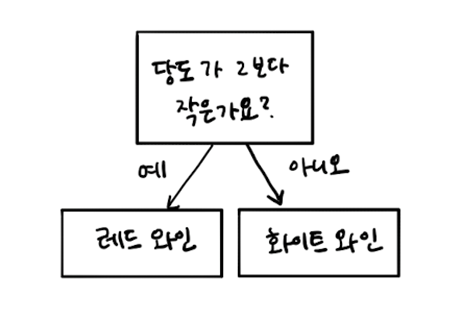

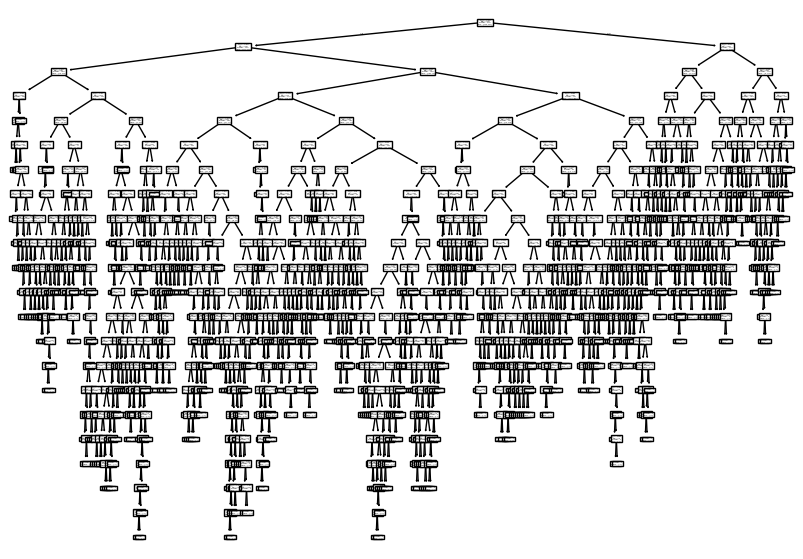

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# **plt는 '도화지와 붓을 든 화가'**이고, plot은 '그림을 그리는 동작'

# plt (도화지와 도구함)--------------------------------------------------------
# 정체: import matplotlib.pyplot as plt로 불러온 **모듈(Module)**의 별명
# 역할: 전체적인 그림의 판을 짭니다. 도화지를 깔고(figure), 축을 만들고, 제목을 붙이고, 다 그린 그림을 화면에 보여주는(show) 전체 관리자 역할
# 사용법: plt.title(), plt.xlabel(), plt.show() 처럼 점(.) 뒤에 명령어를 붙여서 사용합니다

# plot (실제로 선을 긋는 행위)-------------------------------------------------
# 정체: plt 모듈 안에 들어있는 함수(Function) 중 하나입니다.
# 역할: 전달받은 데이터를 바탕으로 도화지에 **'선 그래프'**를 그립니다.
# 사용법: plt.plot(x, y)라고 하면, "화가(plt)야, x와 y 데이터를 가지고 선(plot)을 좀 그려줘!"라고 명령하는 것과 같습니다.

plt.figure(figsize=(10,7)) # figure (형태, 도형)
# figsize = (20,15) 그래프의 사이즈(가로인치, 세로인치)
plot_tree(dt)
plt.show()
# 맨 위 노드(루트 노드), 맨 아래 노드(리프 노드)

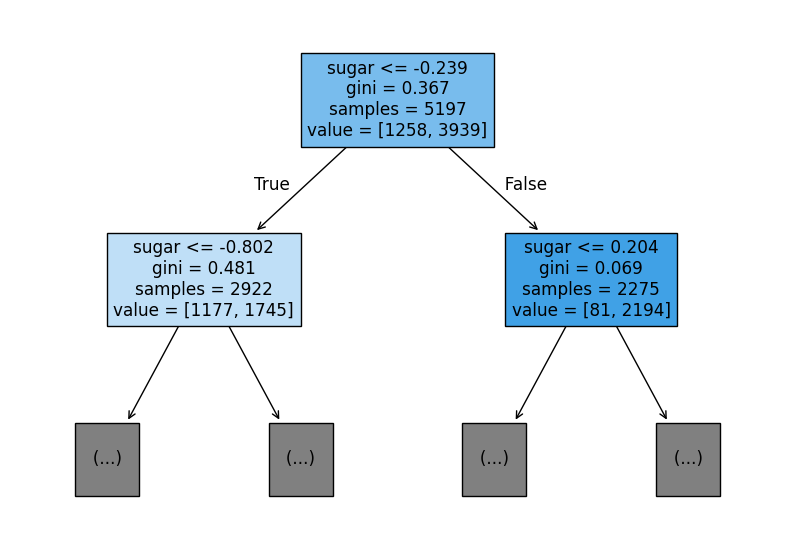

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
# max_depth=1 루트노드를 제외
# filled=True 클래스에 맞게 색칠
# feature_names=['alcohol', 'sugar', 'pH']
plt.show()
# sugar가 -0.239보다 이상이면 False
# sugar가 -0.239보다 같거나 작으면 True(왼쪽 기준 가지로)
# 총 샘플 수는 5.197개, 음성클래스(레드와인) 1.258개, 양성클래스(화이트와인) 3.939개
    # 아래쪽 노드에 왼쪽 노드를 살펴보자.
    # 이 노드는 당도가 더 낮은지를 물어보는 노드(-0.802)
    # 당도가 -0.802와 같거나 낮다면 다시 왼쪽으로
    # 그렇지 않으면 오른쪽으로 이동, 음성클래스 1.177개, 양성클래스 1.745개

    # 오른쪽 노드를 보면 음성클래스가 81개, 양성클래스 2.194개로
    # 대부분이 화이트 와인 샘플이 이 노드로 이동됨

# gini = 0.367 (불순도)
# sample = 5197 (총샘플수)
# value = 값 (1258(1), 3939(0))


# 분기 기준: Sugar (당도)
# 기준값: sugar <= -0.239 (현재 표준점수 기준)
# 왼쪽 가지 (True): 당도가 -0.239 이하인 샘플들이 이동합니다. (상대적으로 덜 단 와인)
# 오른쪽 가지 (False): 당도가 -0.239 초과인 샘플들이 이동합니다. (더 단 와인)
# 트리의 목표: 질문을 던져서 아래쪽 자식 노드들의 지니 불순도 합계를 최대한 낮추는 것입니다.

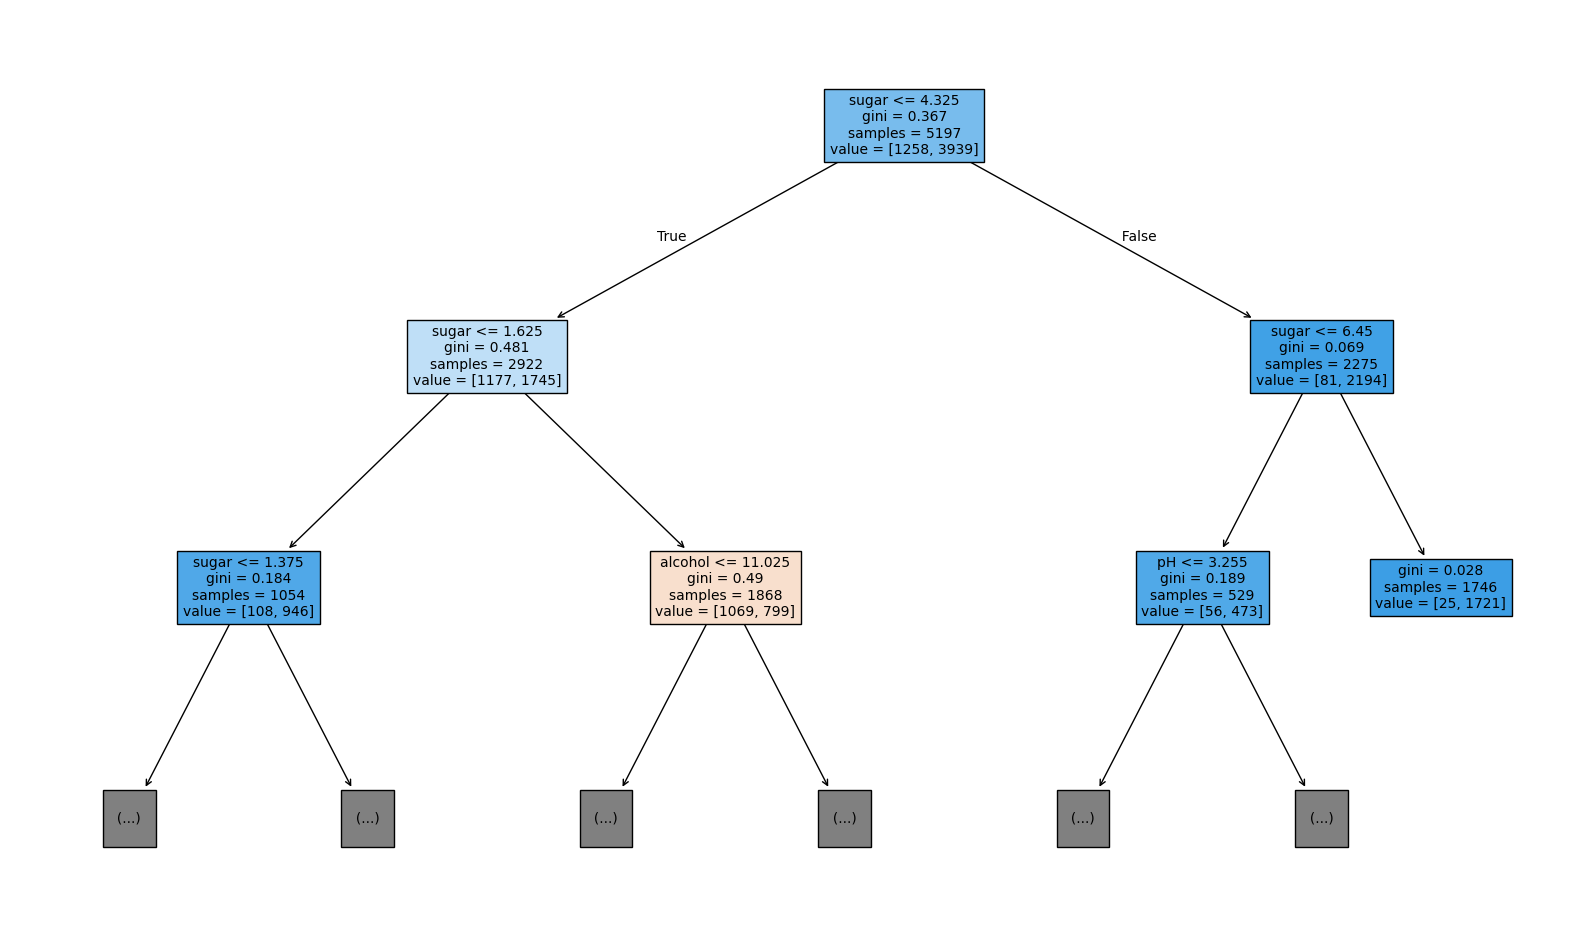

In [26]:
# max_depth를 2나 3으로 늘려서 더 깊은 트리를 확인해봅시다.
plt.figure(figsize=(20,12)) # 트리가 커지므로 도화지 크기를 더 키우는 것이 좋습니다.
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'], fontsize=10)
plt.show()

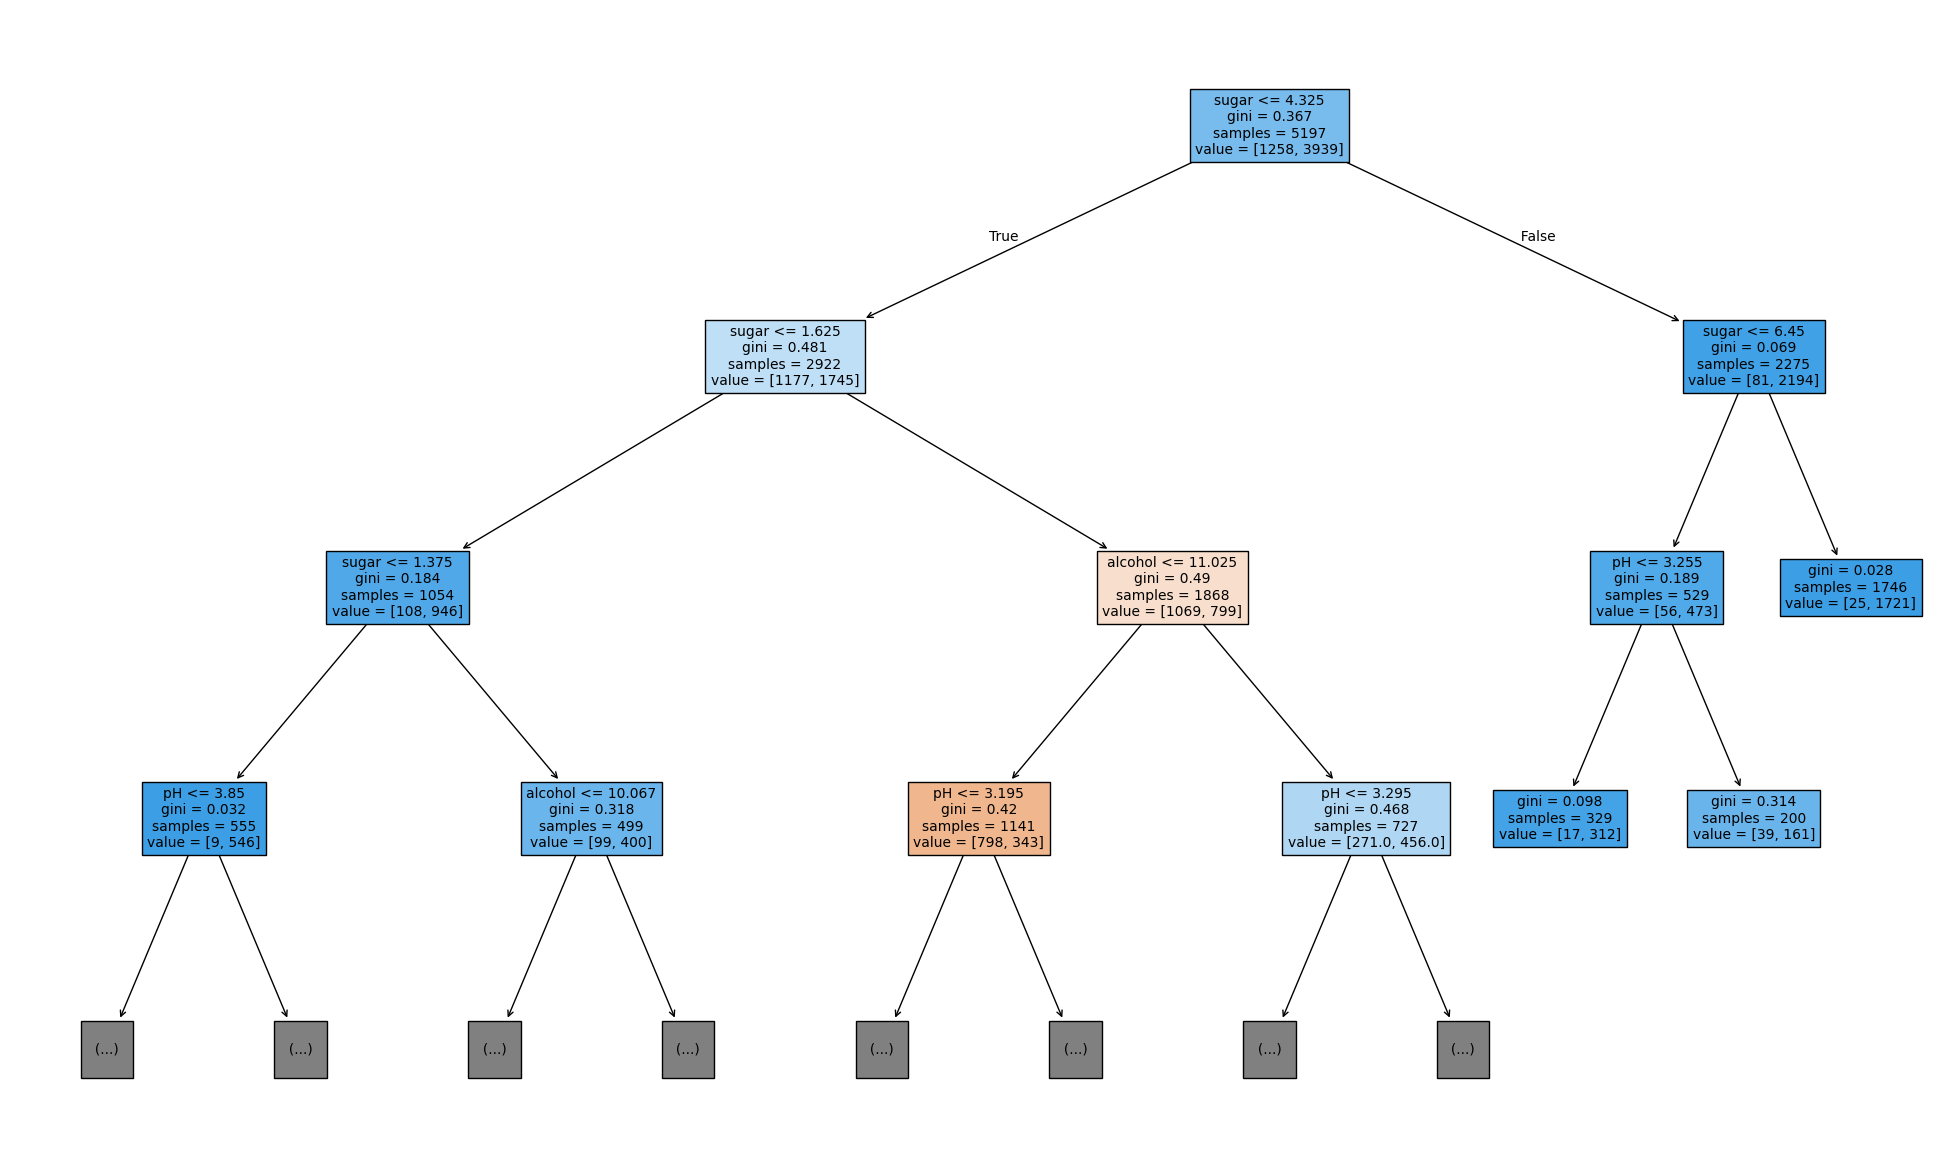

In [27]:
# max_depth를 2나 3으로 늘려서 더 깊은 트리를 확인해봅시다.
plt.figure(figsize=(25,15)) # 트리가 커지므로 도화지 크기를 더 키우는 것이 좋습니다.
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH'], fontsize=10)
plt.show()

In [ ]:
# 노드의 바탕색을 유심히 보면 루트노드보다 더 진하고, 왼쪽 노드는 연해짐
# filled=True로 지정하면 클래스마다 색깔을 지정함. 비율이 높아지면 점점 진하게 표시함

# 결정트리에서 예측하는 방법은 간단한데, 리프노드에서 가장 많은 클래스가 예측 클래스가 됨
# 만약 이 결정 트리로 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한
# 샘플은 모두 양성 클래스로 예측한다. 즉, 1이란 얘기이다. (양성 클래스가 많아서)

# gini 불순도로 노드에서 데이터를 분할할 기준을 정하는 값.

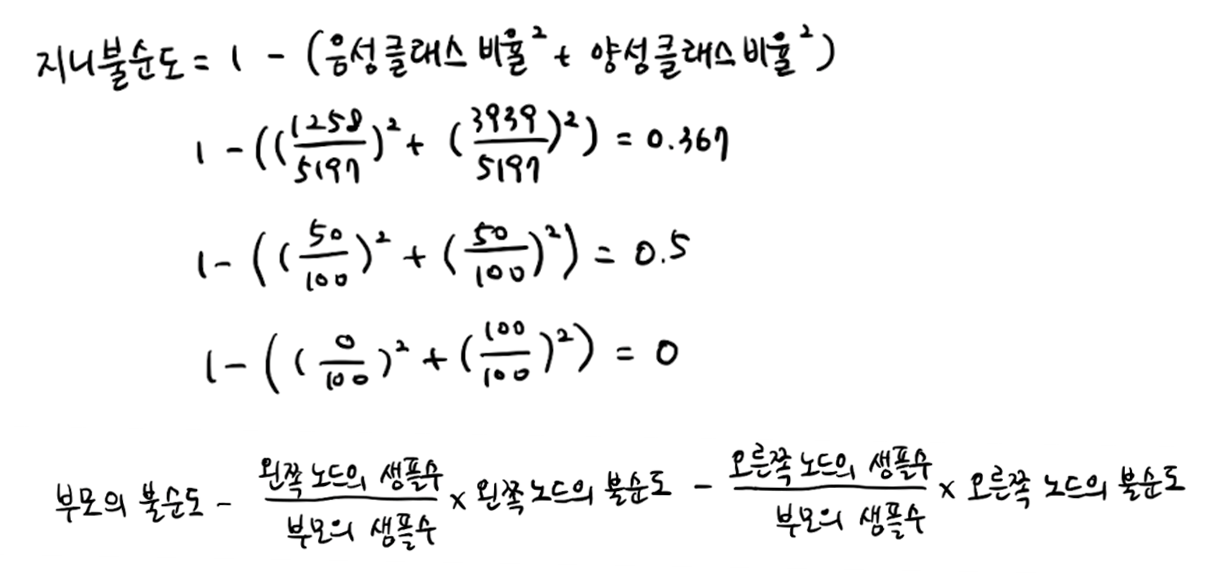

In [ ]:
# 가지치기 : 열매를 잘 맺기 위해서 가지치기를 하듯이 결정트리에서도 사용한다.
# 가지치기를 하지 않으면 무장정 끝까지 자라나는 트리를 만듬(무한대)
# 트리의 깊이(Depth)를 지정하면 된다.

# 새로운 객체를 깊이 3으로 만든다.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)     # 트리의 깊이 max_depth=3
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))   # 84.54%
print(dt.score(test_scaled, test_target))     # 84.15%

0.8454877814123533
0.8415384615384616


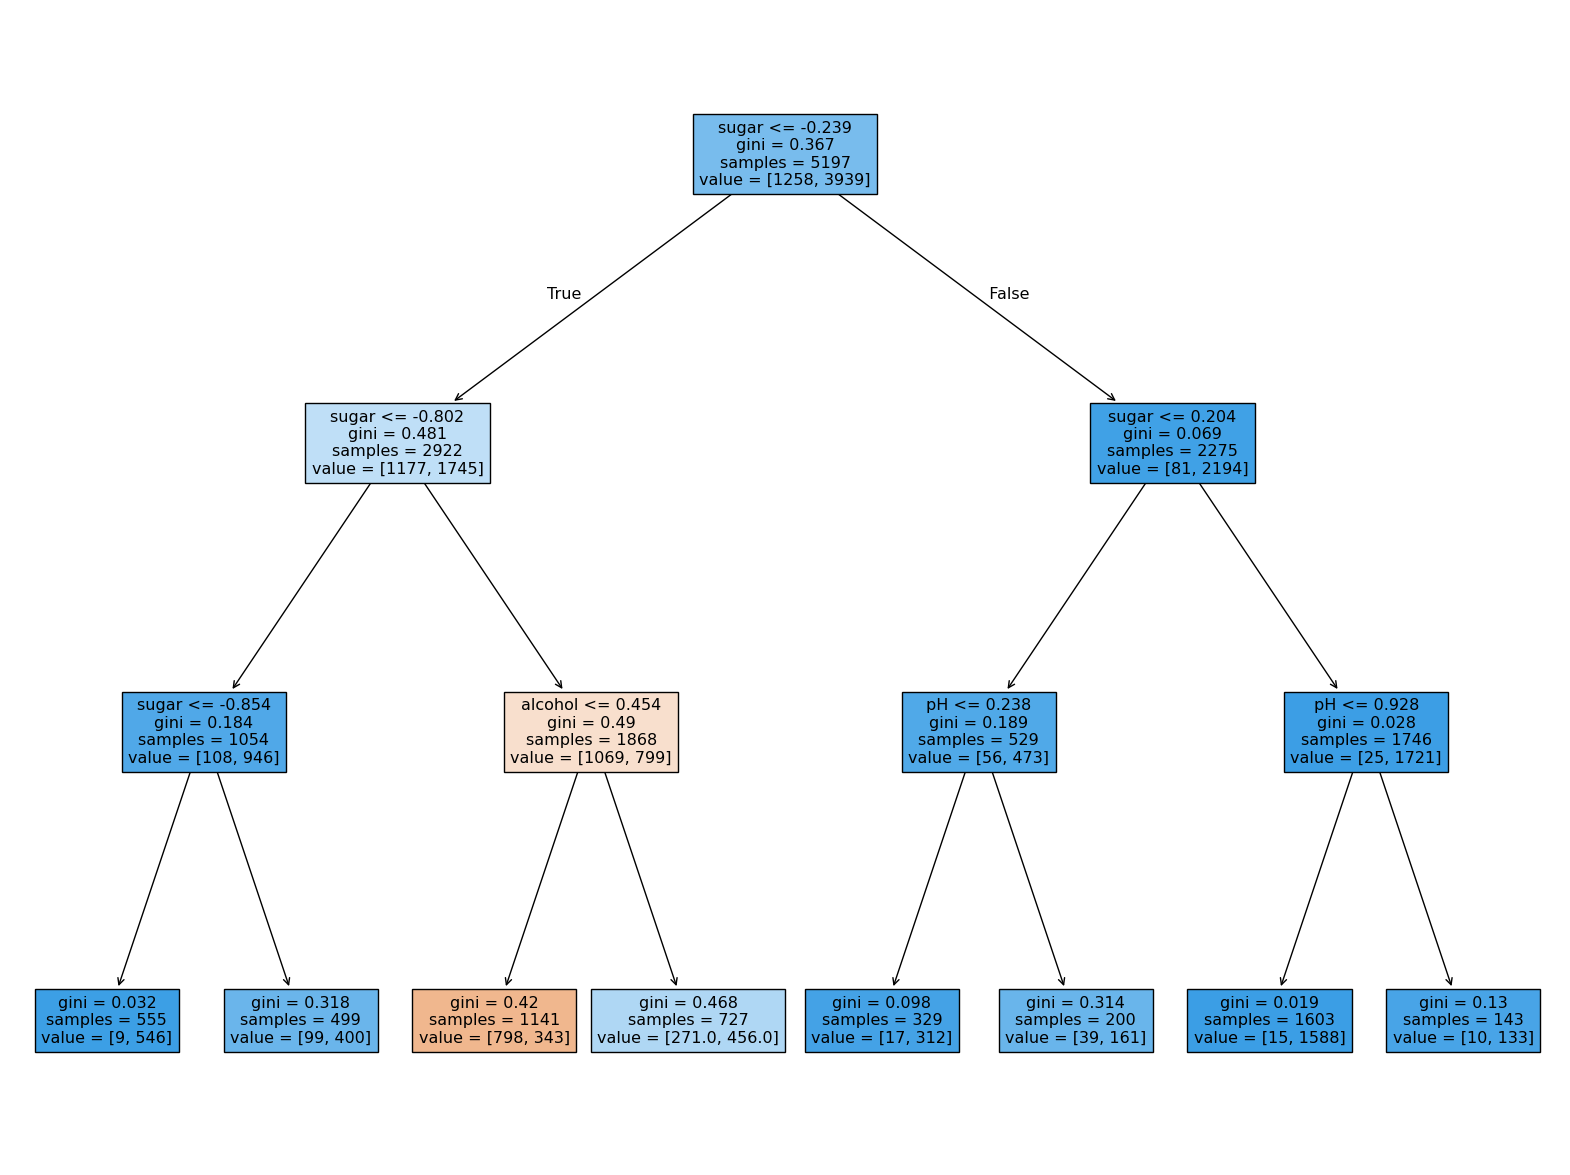

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 그래프 분석
# 루트노드(depth=0) 다음 깊에 있는 depth=1 노드는 모두 당도를 기준으로 훈련세트를 나눔
# 하지만 depth=2에서는 맨 왼쪽 노드만 당도를 기준으로 나누고 외쪽에서 두번째 노드는 알콜
# 도수를 기준으로 나눔 오른쪽 두 노드는 pH를 사용합니다.

# 깊이 3에 있는 노드가 최종 노드인 리프 노드이다.
# 왼쪽에서 세번째에 있는 노드만 음성 클래스가 더 많다.
# 이 노드에 도착해야만 레드와인으로 예측함
# 결론 : 당도는 -0.239보다 작고 -0.802보다 커야 함
#        알콜 도수는 0.454보다 작으면 레드 와인이다.

# -0.802라는 음수로된 당도를 상사에게 보고 할수 있나??
# 표준화(표준점수) 전처리를 하지 않고 결정 트리를 사용해보자.(특성값에 스케일은 효과가 없다.)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))    # 84.52%
print(dt.score(test_input, test_target))      # 84.15% -> 표준화 점수를 사용 안함.

0.8454877814123533
0.8415384615384616


In [ ]:
import numpy as np

sample = np.array([9.5, 1.6, 3.17])
sample = sample.reshape(1, -1)

dt.predict(sample)
# 타깃 = 0(레드와인), 1(화이트와인)

array([1.])

In [ ]:
pred = dt.predict([[9.5, 1.6, 3.17]])

if pred[0] == 0:
  print("Red Wine")
else:
  print("White Wine")

White Wine


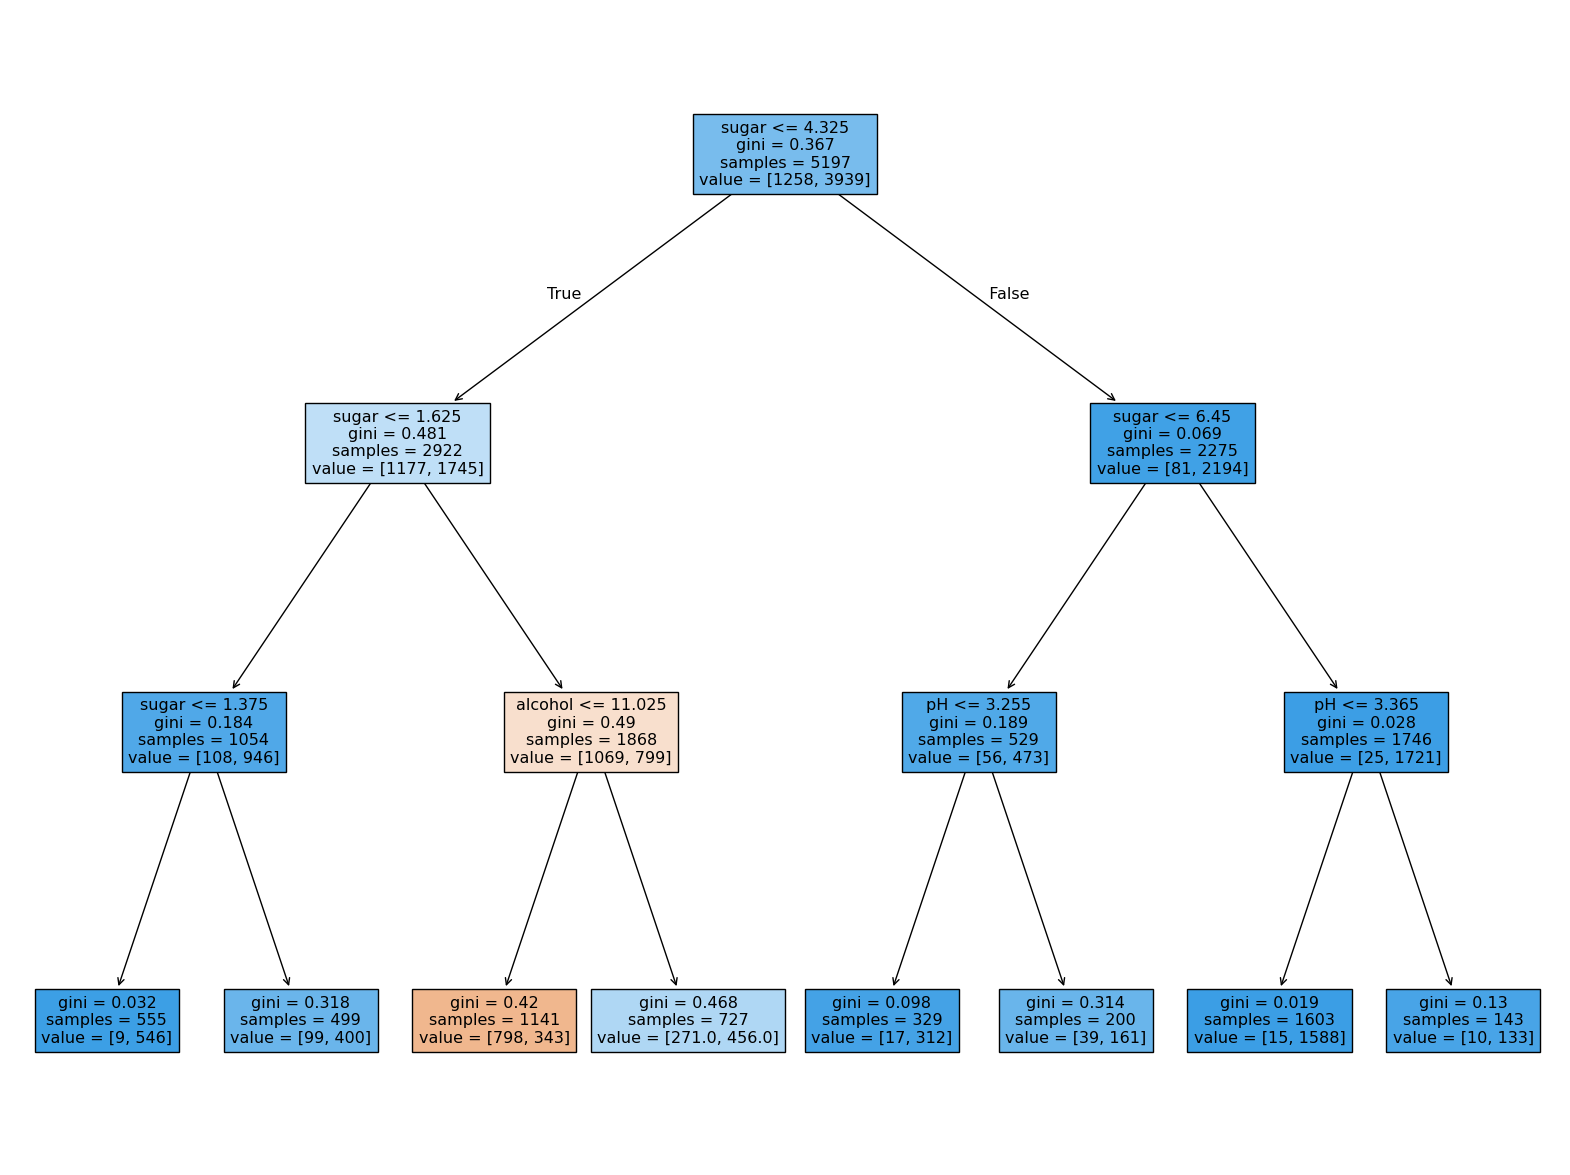

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 결과 보고서에 넣음 내용
# 당도가 1.625보다 크고 4.325보다 작은 와인 중에
# 알콜 도수가 11.025와 같거나 작은 것이 레드와인으로 판단됨.
# 위 트리에서 주황색 부분이 레드와인으로 판단되고, 나머지는 화이트와인이다.!!!

In [ ]:
# 결정 트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해줌
print(dt.feature_importances_)
# [0.12345626 0.86862934 0.0079144 ] = 다 더하면 1이 나와야 함
#   알콜 도수    당도         ph     -> 순서는 입력값

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
# min_impurity_decrease : 최소 불순도
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))    # 88.74%
print(dt.score(test_input, test_target))      # 88.15%

0.8874350586877044
0.8615384615384616


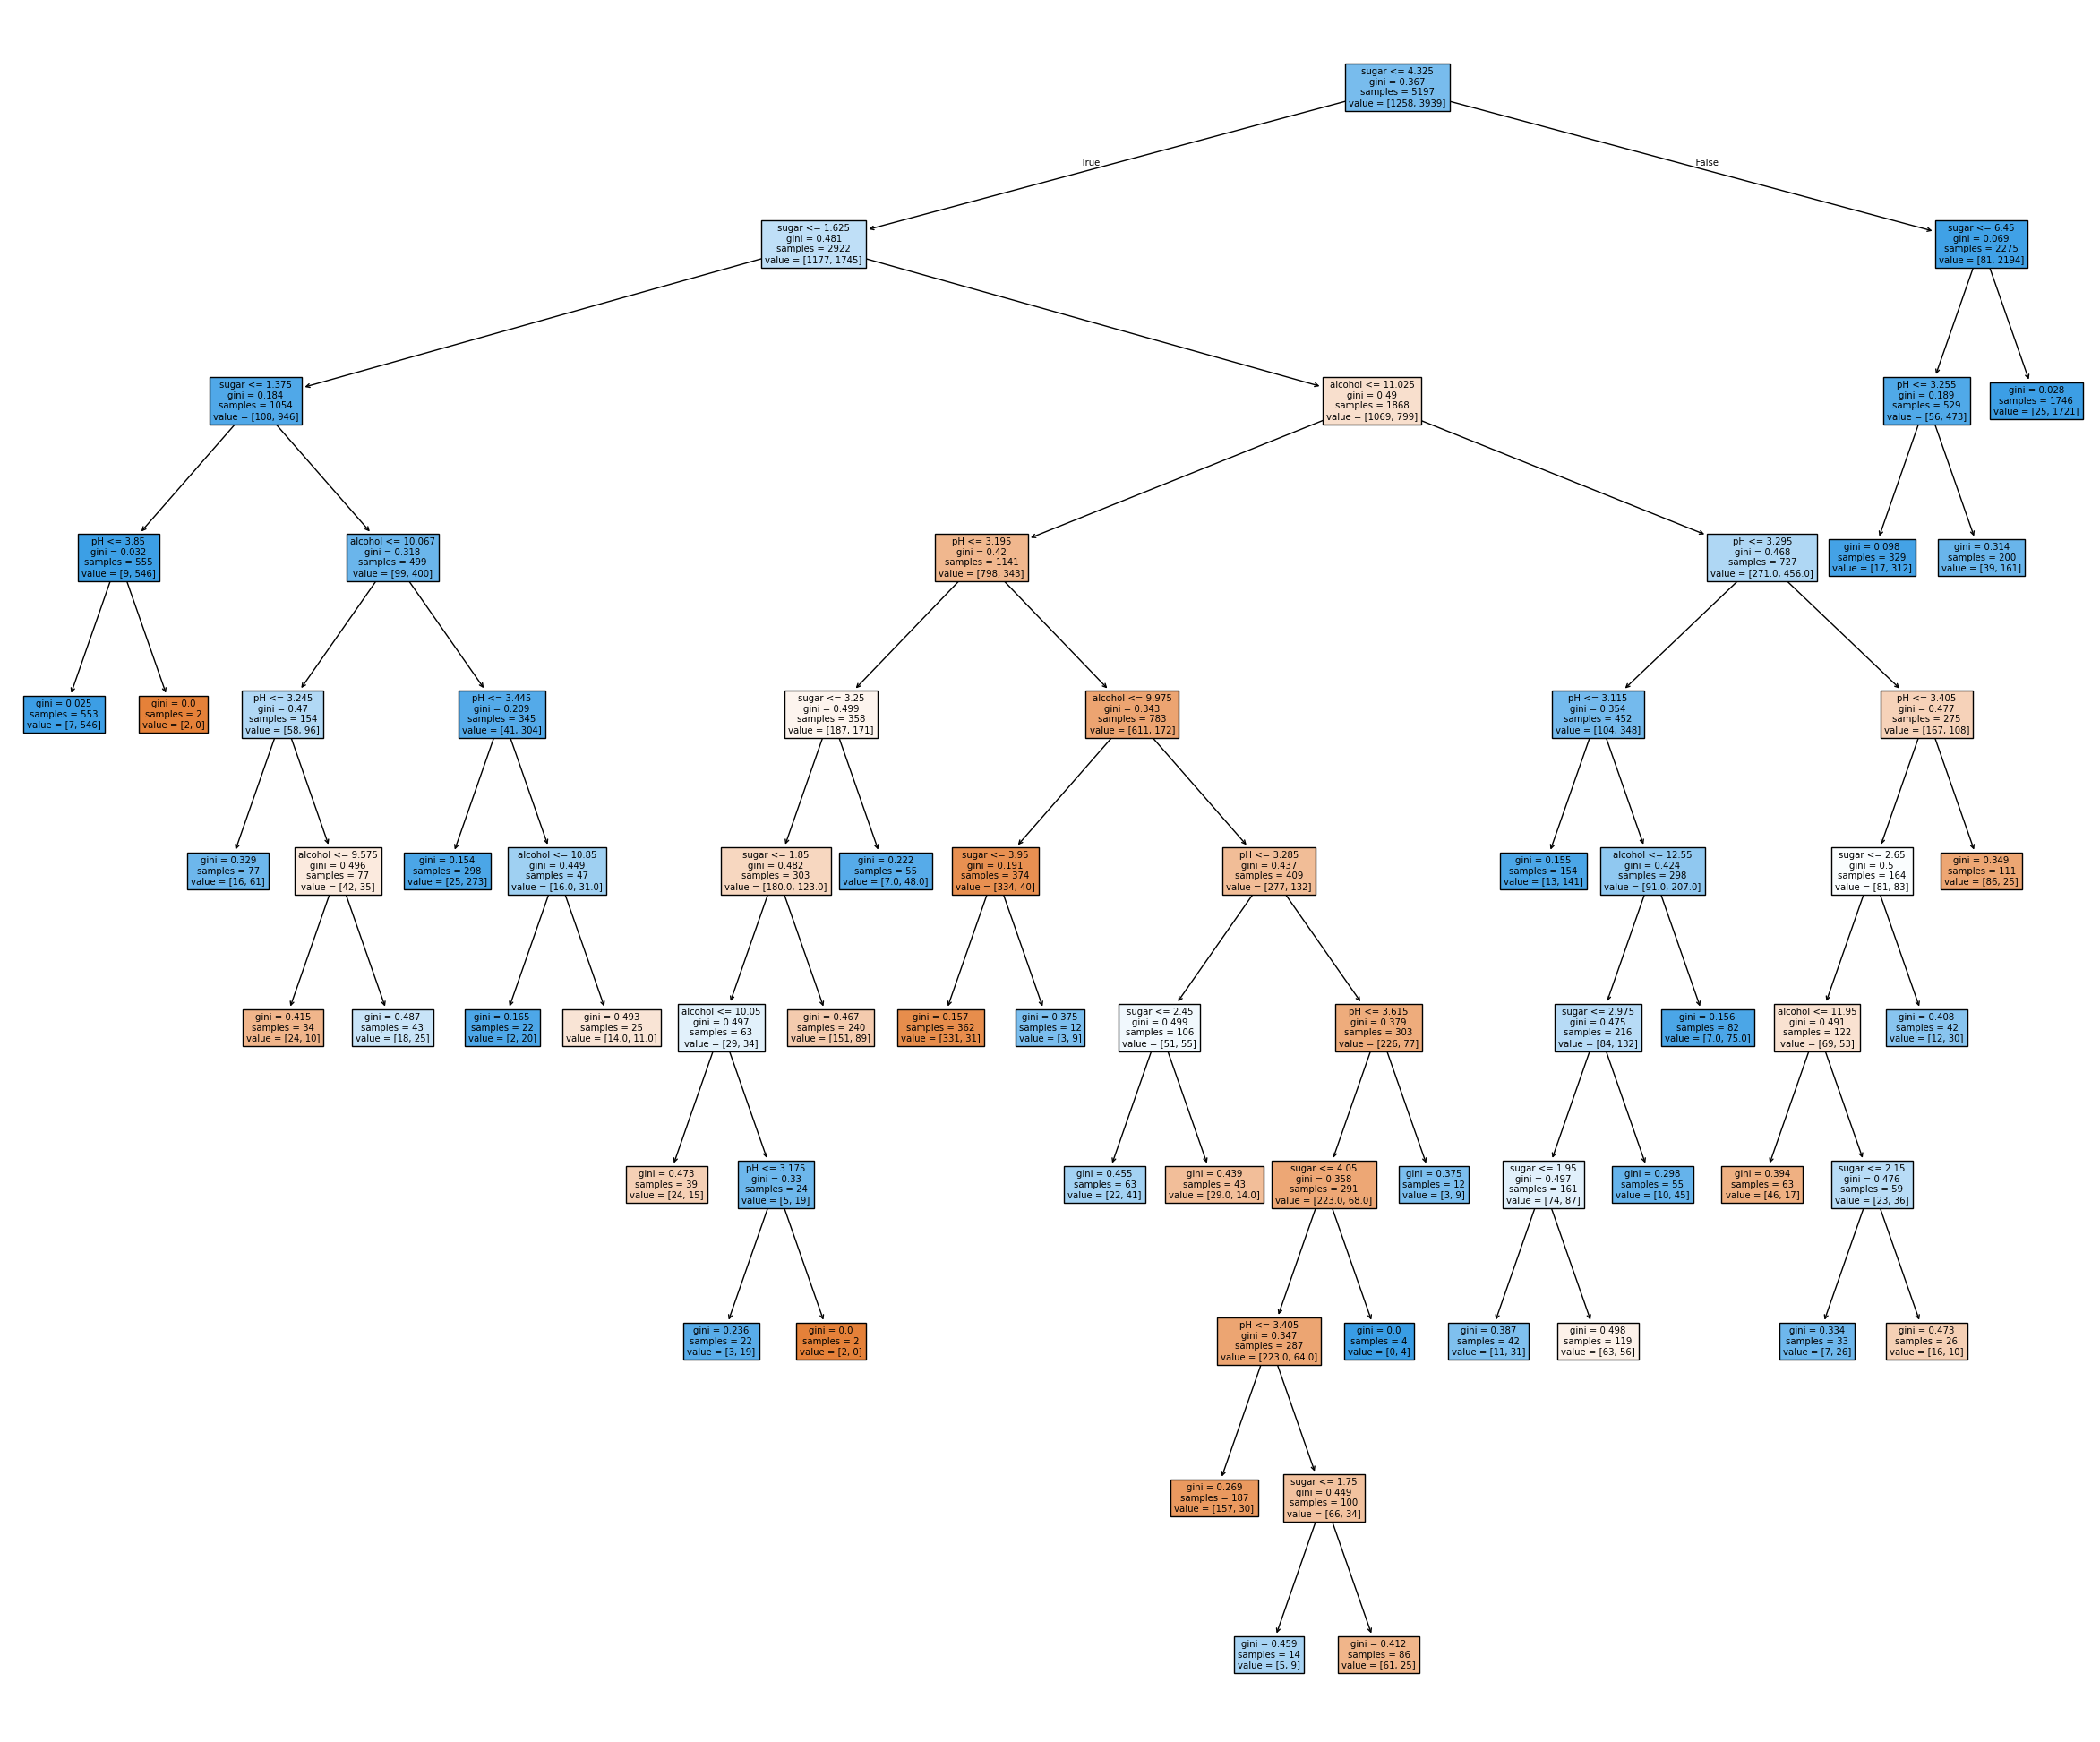

In [ ]:
plt.figure(figsize=(30,25))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()